In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "NO", "NO_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3453 non-null   datetime64[ns]
 1   NO       1579 non-null   float64       
 2   NO_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "NO", "NO_flag"]].describe()

,Time,NO
count,3453,1579.000000
mean,2020-04-23 03:36:26.272806400,3.758169
min,2015-08-01 00:00:00,-0.961910
25%,2017-12-11 00:00:00,0.269552
50%,2020-04-22 00:00:00,0.629285
75%,2022-09-02 00:00:00,1.291760
max,2025-01-27 00:00:00,3001.913930
std,NaN,78.661290


In [7]:
def clean(x):
    if x >= 0.04 and x <= 5000: return x
    return np.nan

In [8]:
dfDay["NO"] = dfDay["NO"].apply(clean)

In [9]:
dfDay["NO"].describe()

count    1456.000000
mean        4.089816
std        81.910054
min         0.040618
25%         0.349628
50%         0.691809
75%         1.406078
max      3001.913930
Name: NO, dtype: float64

In [10]:
dfDay["NO"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: NO
Non-Null Count  Dtype  
--------------  -----  
1456 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [11]:
dfDay.loc[dfDay["NO_flag"] != "OK", "NO"] = np.nan

In [12]:
dfDay[dfDay["NO_flag"] != "OK"]["NO"].info()

<class 'pandas.core.series.Series'>
Index: 3185 entries, 0 to 3452
Series name: NO
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 49.8 KB


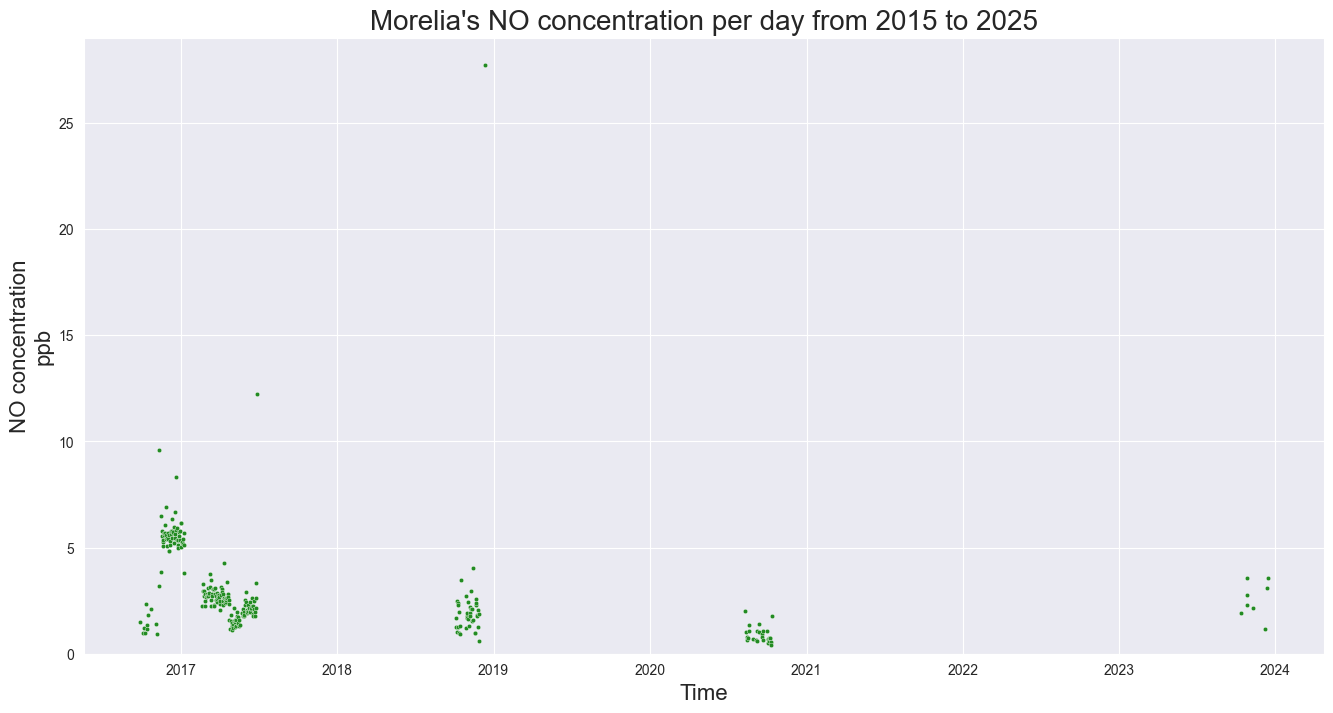

In [16]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["NO"], s=10, color="forestgreen")
plt.ylim(0, 29)
plt.ylabel("NO concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO concentration per day from 2015 to 2025", size=20)
plt.show()